# Exercise 4.1

In [ ]:
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pylab as plt

In [3]:
cdf = pd.read_csv('Cereals.csv')
cdf.head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.00,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.00,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.00,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.00,0.75,34.384843
5,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.00,0.75,29.509541
6,Apple_Jacks,K,C,110,2,0,125,1.0,11.0,14.0,30.0,25,2,1.00,1.00,33.174094
7,Basic_4,G,C,130,3,2,210,2.0,18.0,8.0,100.0,25,3,1.33,0.75,37.038562
8,Bran_Chex,R,C,90,2,1,200,4.0,15.0,6.0,125.0,25,1,1.00,0.67,49.120253
9,Bran_Flakes,P,C,90,3,0,210,5.0,13.0,5.0,190.0,25,3,1.00,0.67,53.313813


    a) Quantitative/Numerical:
           calories, protein, fat, sodium, fiber, carbo, sugars, potass, vitamins, weight, cups, rating
   
       Ordinal:
           shelf
   
       Nominal:
           name, mfr, type       

In [7]:
pd.DataFrame({'mean': cdf.mean(),
              'sd': cdf.std(),
              'min': cdf.min(),
              'max': cdf.max(),
              'median': cdf.median(),
              'length': len(cdf),
              'miss.val': cdf.isnull().sum(),
             })

,mean,sd,min,max,median,length,miss.val
calories,106.883117,19.484119,50,160,110.000000,77,0
carbo,14.802632,3.907326,5,23,14.500000,77,1
cups,0.821039,0.232716,0.25,1.5,0.750000,77,0
fat,1.012987,1.006473,0,5,1.000000,77,0
fiber,2.151948,2.383364,0,14,2.000000,77,0
mfr,NaN,NaN,A,R,NaN,77,0
name,NaN,NaN,100%_Bran,Wheaties_Honey_Gold,NaN,77,0
potass,98.666667,70.410636,15,330,90.000000,77,2
protein,2.545455,1.094790,1,6,3.000000,77,0
rating,42.665705,14.047289,18.0429,93.7049,40.400208,77,0


In [10]:
cdf2 = cdf.drop(columns=['name','mfr','type','shelf'])
cdf2.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,rating
0,70,4,1,130,10.0,5.0,6.0,280.0,25,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8.0,135.0,0,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5.0,320.0,25,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0.0,330.0,25,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8.0,NaN,25,1.0,0.75,34.384843


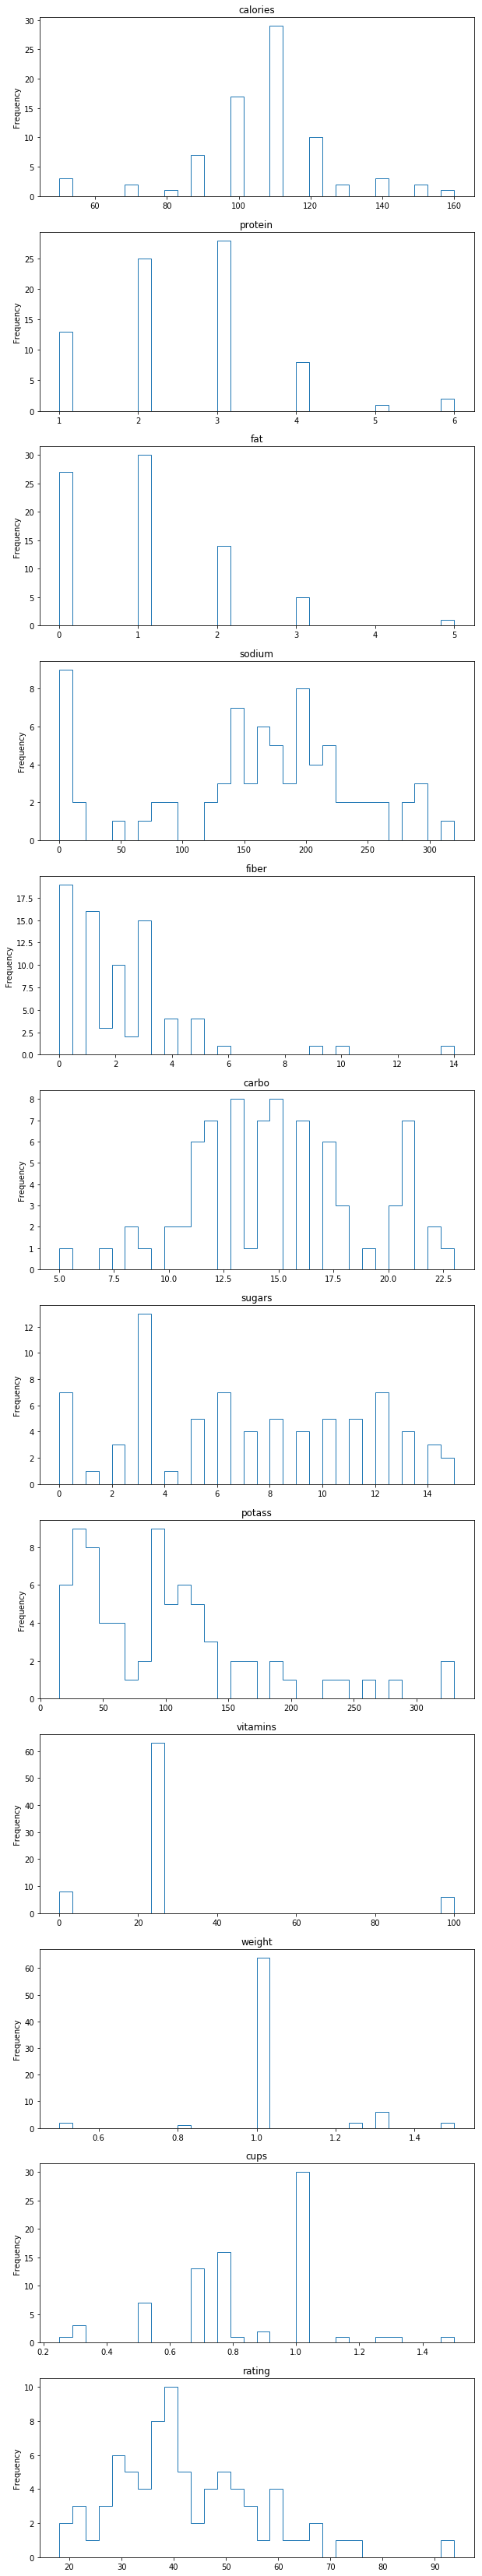

In [11]:
plt.figure(figsize=(10,60))

for i, cl in enumerate(cdf2.columns):
    plt.subplot(len(cdf2.columns),1,i+1)
    cdf2[cl].plot(kind='hist',histtype='step',bins=30)
    plt.title(cl)

b)

    i. Sodium and potassium have the largest variability
    ii. fat, fiber, potassium, and rating are all skewed to having more data on the left side/lower numbers
    iii. Fiber value ~14, potassium value >300, vitamin ~100, rating >90
            These values could be extreme, but not necessarily, they just stand out as more extreme values
            

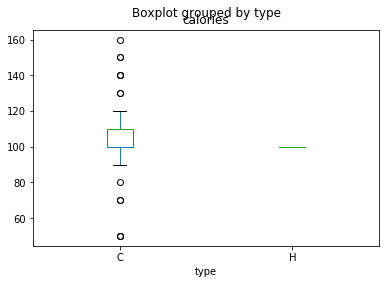

In [12]:
cdf.boxplot(by='type', 
            column=['calories'], 
            grid=False)

d) We can see that there is a large range of calories in cold cereals, but not in hot cereals

In [17]:
BM = cdf.type == 'H'
cdf[BM]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
20,Cream_of_Wheat_(Quick),N,H,100,3,0,80,1.0,21.0,0.0,NaN,0,2,1.0,1.00,64.533816
43,Maypo,A,H,100,4,1,0,0.0,16.0,3.0,95.0,25,2,1.0,1.00,54.850917
57,Quaker_Oatmeal,Q,H,100,5,2,0,2.7,NaN,NaN,110.0,0,1,1.0,0.67,50.828392


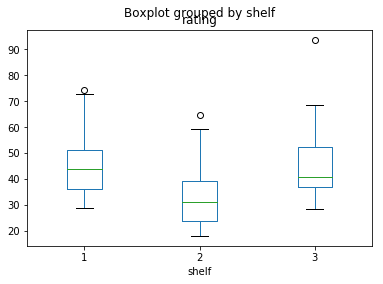

In [18]:
cdf.boxplot(by='shelf', 
            column=['rating'], 
            grid=False)

e) All three boxes overlap each other, so it would be difficult to accurately predict rating from the shelf height.

In [19]:
cdf.corr().round(2)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.00,0.02,0.50,0.30,-0.29,0.26,0.57,-0.07,0.27,0.10,0.70,0.09,-0.69
protein,0.02,1.00,0.21,-0.05,0.50,-0.03,-0.29,0.56,0.01,0.13,0.22,-0.24,0.47
fat,0.50,0.21,1.00,-0.01,0.02,-0.30,0.30,0.20,-0.03,0.26,0.21,-0.18,-0.41
sodium,0.30,-0.05,-0.01,1.00,-0.07,0.30,0.06,-0.04,0.36,-0.07,0.31,0.12,-0.40
fiber,-0.29,0.50,0.02,-0.07,1.00,-0.38,-0.14,0.91,-0.03,0.30,0.25,-0.51,0.58
carbo,0.26,-0.03,-0.30,0.30,-0.38,1.00,-0.47,-0.37,0.22,-0.19,0.14,0.37,0.09
sugars,0.57,-0.29,0.30,0.06,-0.14,-0.47,1.00,0.00,0.10,0.07,0.46,-0.05,-0.76
potass,-0.07,0.56,0.20,-0.04,0.91,-0.37,0.00,1.00,-0.01,0.39,0.42,-0.50,0.42
vitamins,0.27,0.01,-0.03,0.36,-0.03,0.22,0.10,-0.01,1.00,0.30,0.32,0.13,-0.24
shelf,0.10,0.13,0.26,-0.07,0.30,-0.19,0.07,0.39,0.30,1.00,0.19,-0.34,0.03


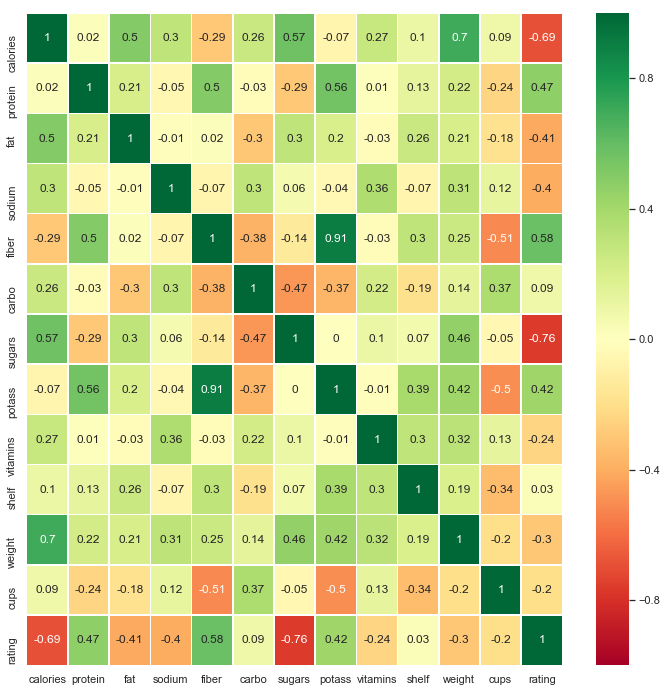

In [20]:
import seaborn as sns; sns.set()

data = cdf.corr().round(2)

plt.figure(figsize=(12,12))

sns.heatmap(data, linewidths=.5, annot=True, center=0, vmin=-1, vmax=1,cmap="RdYlGn")
plt.show()

f) 
        
    i.highest correlation: potassium & fiber, sugars & rating, calories & rating
    ii. We can remove rating, since it can likely be predicted by calories and sugar, and we could remove either potassium or fiber
    iii.Normalization does not change the correlation, because the same relationship exists. It would just change the scale

# Exercise 4.4

g) The first PC shows that the sodium is contributing the most to the creation of this PC, and its large variability is contributing to most of the variability seen in the PC, since its variability is -0.98.

a)	The variance is so much greater in PC1 because that is the way PCA works. It puts the most of the variability into the first PC. Also, we can see that Proline is contributing greatly to that because its PC1 value is 0.999823, meaning that its variability is creating most of the variability in PC1. Proline must have a large range, so it also has a large variability, and since the data is not normalized, it largely affects the PCA.
b)	When the data is normalized, attributes with large ranges will not dominate the PCA. Then all variables will have equal importance of variability.
